In [1]:
using CovidSim_ilm

┌ Info: Precompiling CovidSim_ilm [top-level]
└ @ Base loading.jl:1278


In [2]:
using DataFrames
using Plots
using Printf
pyplot()

Plots.PyPlotBackend()

In [3]:
seed_1_6 = seed_case_gen(1, [0,3,3,0,0], 1, nil, agegrps)

(::CovidSim_ilm.var"#scase#64"{Int64,Array{Int64,1},Int64,Int64,UnitRange{Int64}}) (generic function with 1 method)

In [4]:
str_50 = sd_gen(start=50, comply=.8, cf=(.2,1.2), tf=(.18,.41))

Spreadcase(50, (0.2, 1.2), (0.18, 0.41), 0.8)

In [5]:
# working with specific locale
seattle = 53033

53033

In [6]:
alldict, env, series = run_a_sim(180, seattle, showr0=false, silent=true,
        spreadcases=[],
        runcases=[seed_1_6]);

*** seed day 1 locale 53033....
(sptime, trtime) = (23.39312992300001, 66.31777392000001)


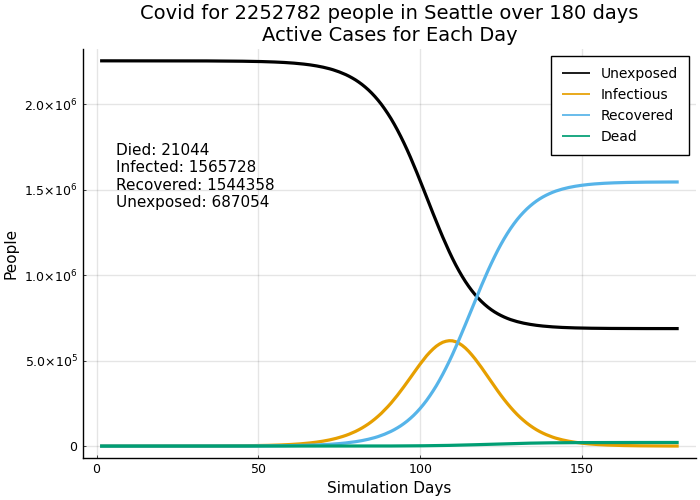

In [7]:
cumplot(series,seattle,geo=alldict["geo"])

In [8]:
sea_outcome = virus_outcome(series,seattle, base=:pop)
println(sea_outcome)
for k in keys(sea_outcome)
    @printf("%-12s %f\n", k, sea_outcome[k])
end

Dict("unexposed" => 0.3049810544856657,"dead" => 0.009341363721914651,"recovered" => 0.6855355348245897,"totinfected" => 0.0)
unexposed    0.304981
dead         0.009341
recovered    0.685536
totinfected  0.000000


#### Death Percentage Across Age Groups

In [9]:
agelabels = ["0-20", "20-40", "40-60", "60-80", "80+", "Total"]
deadvals = series[seattle][:cum][end,[map2series.dead]...]
pctvals = round.([deadvals[i] / deadvals[6] for i in 1:length(deadvals)], digits=3)
death_dist_by_age = hcat(agelabels, deadvals, pctvals)

6×3 Array{Any,2}:
 "0-20"      89  0.004
 "20-40"    379  0.018
 "40-60"   1875  0.089
 "60-80"   7612  0.362
 "80+"    11089  0.527
 "Total"  21044  1.0

#### Death Percentage of Infected *Within* Each Age Group

In [10]:
dead = series[seattle][:cum][end, map2series.dead] 
infected = series[seattle][:cum][1,map2series.unexposed] .- series[seattle][:cum][end,map2series.unexposed]
death_pct_infected_within_age = round.(dead ./ infected, digits=5)
cats = hcat(agelabels, death_pct_infected_within_age)

6×2 Array{Any,2}:
 "0-20"   0.00049
 "20-40"  0.00075
 "40-60"  0.00384
 "60-80"  0.02331
 "80+"    0.16723
 "Total"  0.01344

#### Death Percentage of Population *Within* Each Age Group

In [12]:
pop = series[seattle][:cum][1,map2series.unexposed]
death_pct_bypop_within_age = round.(dead ./ pop, digits=5)
hcat(agelabels, death_pct_bypop_within_age)

6×2 Array{Any,2}:
 "0-20"   0.00016
 "20-40"  0.00062
 "40-60"  0.00326
 "60-80"  0.01836
 "80+"    0.12622
 "Total"  0.00934

#### Severe Percentage of Infected *Within* Each Age Group

In [13]:
sev_outcome = sum(clamp.(series[seattle][:new][:, map2series.severe], 0, 10_000_000), dims=1)'
sev_pct_infected_byage = round.(sev_outcome ./ infected, digits=5)
hcat(agelabels, sev_pct_infected_byage)

6×2 Array{Any,2}:
 "0-20"   0.07771
 "20-40"  0.02819
 "40-60"  0.02903
 "60-80"  0.04339
 "80+"    0.21367
 "Total"  0.04524

#### Severe Percentage of Population *Within* Each Age Group

In [14]:
sev_pct_pop_byage = round.(sev_outcome ./ pop, digits=5)
hcat(agelabels, sev_pct_pop_byage)

6×2 Array{Any,2}:
 "0-20"   0.02506
 "20-40"  0.02321
 "40-60"  0.02466
 "60-80"  0.03418
 "80+"    0.16126
 "Total"  0.03145

### Recovered Distribution by Age Group

In [15]:
agelabels = ["0-20", "20-40", "40-60", "60-80", "80+", "Total"]
recovals = series[seattle][:cum][end,[map2series.recovered]...]
pctvals = round.([recovals[i] / recovals[6] for i in 1:length(recovals)], digits=3)
deadtbl = hcat(agelabels, recovals, pctvals)

6×3 Array{Any,2}:
 "0-20"    182163  0.118
 "20-40"   502125  0.325
 "40-60"   486055  0.315
 "60-80"   318817  0.206
 "80+"      55198  0.036
 "Total"  1544358  1.0

### Unexposed Percentage by Age Group

In [16]:
agelabels = ["0-20", "20-40", "40-60", "60-80", "80+", "Total"]
unexvals = series[seattle][:cum][end,[map2series.unexposed]...]
pctvals = round.([unexvals[i] / unexvals[6] for i in 1:length(unexvals)], digits=3)
deadtbl = hcat(agelabels, unexvals, pctvals)

6×3 Array{Any,2}:
 "0-20"   383139  0.558
 "20-40"  107923  0.157
 "40-60"   86447  0.126
 "60-80"   87995  0.128
 "80+"     21550  0.031
 "Total"  687054  1.0

### Worldometers Death Demographics for New York City

<img src=attachment:image.png width="500" height="500">
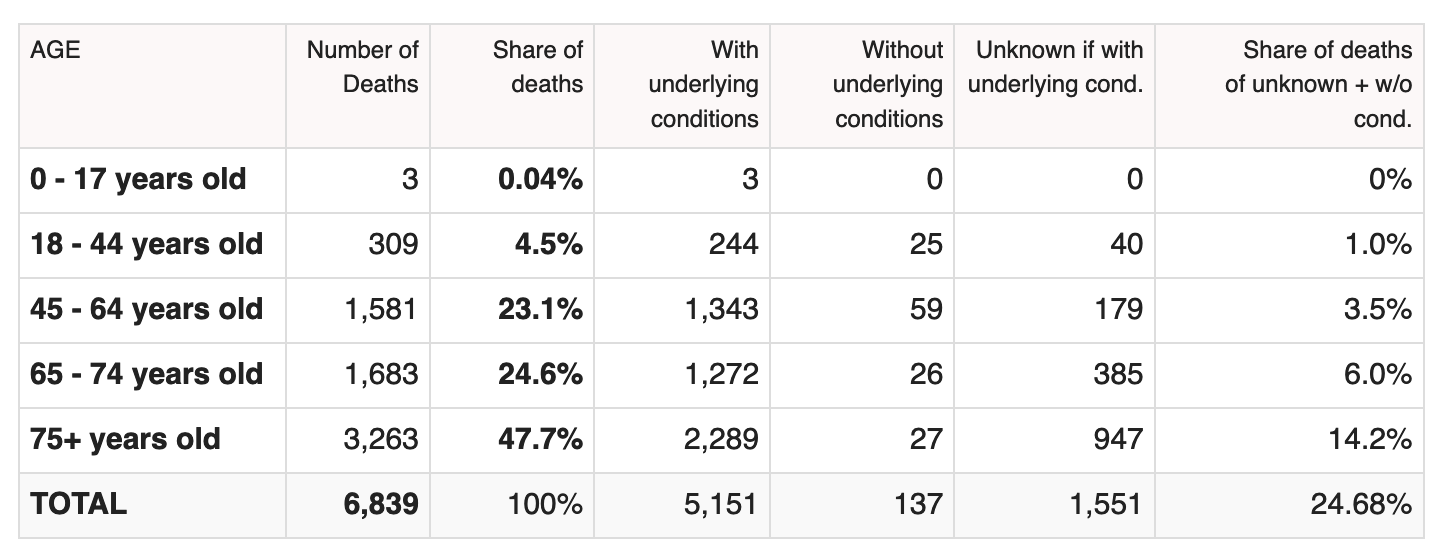

#### CDC Age Demographics for Covid-19 Deaths
##### through May 20, 2020 (based on slow reporting verified death reports--not latest)
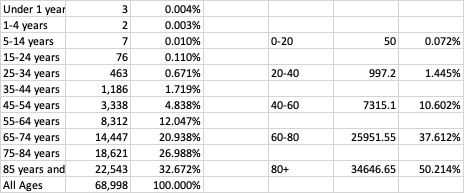

In [18]:
deadseries = series[seattle][:cum][:,[map2series.dead]...]
n = size(deadseries,1)

180

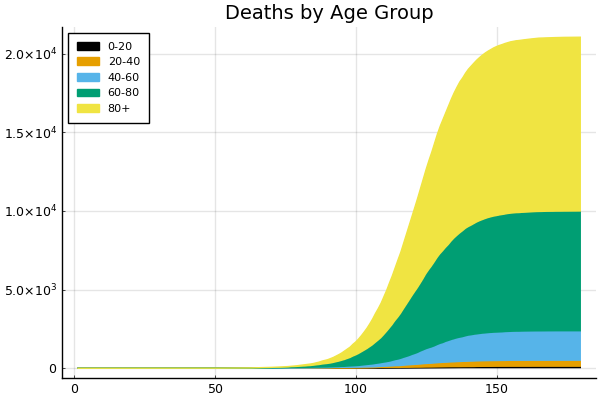

In [19]:
ageserieslabels = [agelabels[1] agelabels[2] agelabels[3] agelabels[4] agelabels[5]]
areaplot(1:n, deadseries[:,1:5],labels=ageserieslabels, title="Deaths by Age Group")

In [20]:
[deadseries[n,1:6] deadseries[n,1:6] ./ deadseries[n,6]]

6×2 Array{Float64,2}:
    89.0  0.00422923
   379.0  0.0180099
  1875.0  0.089099
  7612.0  0.361718
 11089.0  0.526944
 21044.0  1.0

## Plots by Disease Condition

In [21]:
condseries = series[seattle][:cum][:,[map2series.nil[6], map2series.mild[6], map2series.sick[6], 
            map2series.severe[6]]]
n = size(condseries,1);

In [22]:
condlabels = ["nil", "mild", "sick", "severe"]
day = 180
condday = series[seattle][:cum][day,[map2series.nil[6], map2series.mild[6], map2series.sick[6], 
            map2series.severe[6]]]
condend = series[seattle][:cum][end,[map2series.nil[6], map2series.mild[6], map2series.sick[6], 
            map2series.severe[6]]]
condpct = round.(condday ./ sum(condday), digits=2)
println("Approximate Percentage Disease Condition\n(across all ages)")
condtbl = hcat(condlabels, condday, condpct)

Approximate Percentage Disease Condition
(across all ages)


4×3 Array{Any,2}:
 "nil"     335  0.21
 "mild"    805  0.49
 "sick"    415  0.25
 "severe"   75  0.05

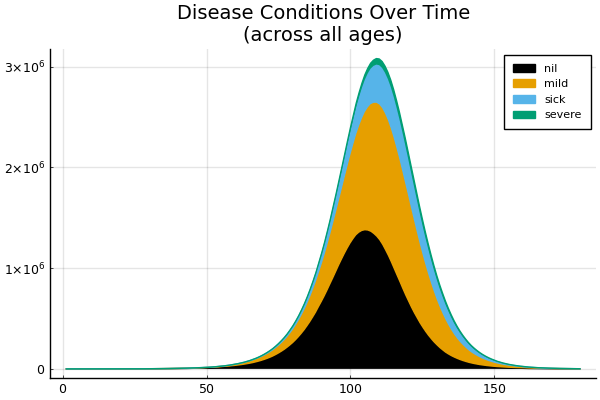

In [23]:
condserieslabels = [condlabels[1] condlabels[2] condlabels[3] condlabels[4]]
areaplot(1:n, condseries[:,:],labels=condserieslabels, 
    title="Disease Conditions Over Time\n(across all ages)")

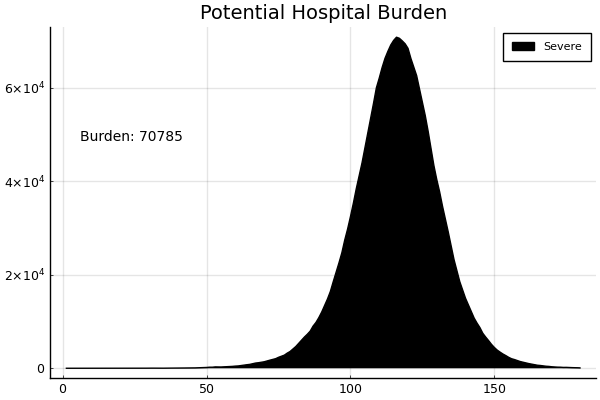

In [24]:
condserieslabels = [condlabels[4]]
areaplot(1:n, condseries[:,4],labels="Severe", title="Potential Hospital Burden")
maxsevere = maximum(condseries[:, 4])
half_yscale = floor(Int, maxsevere * 0.7)
annotate!((6,half_yscale,Plots.text("Burden: $maxsevere", 10, :left)))

### Check the Basic Identities

In [45]:
cumhistmx = alldict["dat"]["cumhistmx"]
newhistmx = alldict["dat"]["newhistmx"]
openmx = alldict["dat"]["openmx"];

In [46]:
locale = seattle
outcome = (
           total_infected = series[locale][:cum][1, 6] - series[locale][:cum][180,6],
           total_pop = series[locale][:cum][180,6] + series[locale][:cum][180,54],
           whos_left = series[locale][:cum][180,map2series.dead[6]] + series[locale][:cum][180,map2series.recovered[6]]
              + series[locale][:cum][180,map2series.infectious[6]] + series[locale][:cum][180,map2series.unexposed[6]],
           end_unexposed = series[locale][:cum][180,map2series.unexposed[6]],
           end_infected = series[locale][:cum][180,map2series.infectious[6]],
           end_recovered = series[locale][:cum][180,map2series.recovered[6]],
           end_dead = series[locale][:cum][180,map2series.dead[6]]
       )

(total_infected = 1569962, total_pop = 2252782, whos_left = 2252782, end_unexposed = 682814, end_infected = 9, end_recovered = 1551484, end_dead = 18475)

In [47]:
transeries = DataFrame(transq)


,day,lag,agegrp,node,locale,recovered,dead,nil,mild,sick,severe
,Int64,Int64,Int64,Array…,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,5,5,2,"[5, 5]",53033,0,0,1,2,0,0
2,5,5,3,"[5, 5]",53033,0,0,0,3,0,0
3,7,5,2,"[5, 5]",53033,0,0,1,0,0,0
4,7,5,4,"[5, 5]",53033,0,0,0,0,1,0
5,8,5,3,"[5, 5]",53033,0,0,1,0,0,0
6,9,9,2,"[9, 6]",53033,0,0,0,2,0,0
7,9,9,2,"[9, 5]",53033,0,0,0,0,1,0
8,9,5,2,"[5, 5]",53033,0,0,1,1,0,0
9,9,9,3,"[9, 6]",53033,0,0,0,3,0,0


In [48]:
trans = (dead = sum(transeries[:,:dead]), recovered = sum(transeries[:,:recovered]))

(dead = 18475, recovered = 1551484)

In [49]:
err = outcome.total_infected - (trans.recovered + trans.dead + outcome.end_infected)

-6

In [50]:
spreadseries = day2df(spreadq)
check_infected = sum(spreadseries[:,:infected])

1569962

end_exposed is ok (off by 2 from age rounding and 6 seeds)
total infected is ok; matches check_infected

##### Some random documentation for me

In [29]:
plotattr()

Specify an attribute type to get a list of supported attributes. Options are Series, Subplot, Plot, Axis


In [30]:
plotattr(:Subplot)

Defined Subplot attributes are:
annotations, aspect_ratio, background_color_inside, background_color_legend, background_color_subplot, bottom_margin, camera, clims, color_palette, colorbar, colorbar_title, extra_kwargs, fontfamily_subplot, foreground_color_legend, foreground_color_subplot, foreground_color_title, framestyle, left_margin, legend, legendfontcolor, legendfontfamily, legendfonthalign, legendfontrotation, legendfontsize, legendfontvalign, legendtitle, legendtitlefontcolor, legendtitlefontfamily, legendtitlefonthalign, legendtitlefontrotation, legendtitlefontsize, legendtitlefontvalign, margin, projection, right_margin, subplot_index, title, titlefontcolor, titlefontfamily, titlefonthalign, titlefontrotation, titlefontsize, titlefontvalign, titlelocation, top_margin


In [31]:
plotattr(:Series)

Defined Series attributes are:
arrow, bar_edges, bar_position, bar_width, bins, colorbar_entry, contour_labels, contours, extra_kwargs, fill_z, fillalpha, fillcolor, fillrange, group, hover, label, levels, line_z, linealpha, linecolor, linestyle, linewidth, marker_z, markeralpha, markercolor, markershape, markersize, markerstrokealpha, markerstrokecolor, markerstrokestyle, markerstrokewidth, match_dimensions, normalize, orientation, primary, quiver, ribbon, series_annotations, seriesalpha, seriescolor, seriestype, show_empty_bins, smooth, stride, subplot, weights, x, xerror, y, yerror, z, zerror


In [32]:
plotattr(:Plot)

Defined Plot attributes are:
background_color, background_color_outside, display_type, dpi, extra_kwargs, extra_plot_kwargs, fontfamily, foreground_color, html_output_format, inset_subplots, layout, link, overwrite_figure, plot_title, pos, show, size, tex_output_standalone, thickness_scaling, warn_on_unsupported, window_title


In [33]:
plotattr("size")

size {NTuple{2,Int}}
windowsize, wsize

(width_px, height_px) of the whole Plot
Plot attribute,  default: (600, 400)


In [34]:
plotattr(:Axis)

Defined Axis attributes are:
discrete_values, draw_arrow, flip, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_guide, foreground_color_minor_grid, foreground_color_text, formatter, grid, gridalpha, gridlinewidth, gridstyle, guide, guide_position, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotation, guidefontsize, guidefontvalign, lims, link, minorgrid, minorgridalpha, minorgridlinewidth, minorgridstyle, minorticks, mirror, rotation, scale, showaxis, tick_direction, tickfontcolor, tickfontfamily, tickfonthalign, tickfontrotation, tickfontsize, tickfontvalign, ticks, widen
